In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib
from pandas.plotting import scatter_matrix
from datetime import datetime, timedelta
from scipy.stats import shapiro, pearsonr
from scipy import stats

## Traffic jams,alerts,wazers - Statistics

Traffic jams groupby datum a hours, spojení s "kalendářem" 13.7.-8.10.2020

vytvoření kalendáře

In [2]:
base = datetime.strptime('2020-07-28 00:00:00', '%Y-%m-%d %H:%M:%S')
end = datetime.strptime('2020-10-08 15:00:00', '%Y-%m-%d %H:%M:%S')
dif = end - base
date_list = [base + timedelta(hours=x) for x in range (int(dif.total_seconds()/3600))]

In [3]:
calendar = pd.DataFrame(date_list, columns = ['dateTime'])

In [4]:
def date(vstup):
    return vstup.date()

In [5]:
def hour(vstup):
    return vstup.hour

In [8]:
def day(vstup):
    return vstup.dayofweek

In [9]:
calendar['datum'] = calendar['dateTime'].apply(date)
calendar['hour'] = calendar['dateTime'].apply(hour)
calendar['day'] = calendar['dateTime'].apply(day)
calendar

,dateTime,datum,hour,day
0,2020-07-28 00:00:00,2020-07-28,0,1
1,2020-07-28 01:00:00,2020-07-28,1,1
2,2020-07-28 02:00:00,2020-07-28,2,1
3,2020-07-28 03:00:00,2020-07-28,3,1
4,2020-07-28 04:00:00,2020-07-28,4,1
...,...,...,...,...
1738,2020-10-08 10:00:00,2020-10-08,10,3
1739,2020-10-08 11:00:00,2020-10-08,11,3
1740,2020-10-08 12:00:00,2020-10-08,12,3
1741,2020-10-08 13:00:00,2020-10-08,13,3


In [11]:
jamsGroupDf = pd.read_csv('jamsGroupDf.csv', encoding = 'UTF-8')

In [12]:
alertsGroupDf = pd.read_csv('alertsGroupDfh.csv', encoding = 'UTF-8')

In [13]:
maxWazers = pd.read_csv('maxWazersh.csv', encoding = 'UTF-8')

In [14]:
jamsGroupDf['datum'] = pd.to_datetime(jamsGroupDf['datum']).apply(date)
jamsGroupDf = jamsGroupDf.rename(columns={'hours':'hour', 'uuid':'jamsCount'})

In [15]:
alertsGroupDf['datum'] = pd.to_datetime(alertsGroupDf['datum']).apply(date)
alertsGroupDf = alertsGroupDf.rename(columns={'hours':'hour', 'alertID':'alertsCount'})

In [16]:
maxWazers['datum']=pd.to_datetime(maxWazers['datum'])

In [17]:
calendarDf = calendar.merge(jamsGroupDf, how = 'left', on = ['datum','hour']).merge(alertsGroupDf, how = 'left', on =['datum','hour'])

In [18]:
calendarDf['datum']=pd.to_datetime(calendarDf['datum'])

In [19]:
jAwDf = pd.merge(calendarDf,maxWazers,how='left', on = ['datum','hour'])

In [20]:
jAwDf['jamsCount'] = jAwDf['jamsCount'].fillna(0)
jAwDf['alertsCount'] = jAwDf['alertsCount'].fillna(0)
jAwDf['wazers'] = jAwDf['wazers'].fillna(0)

In [21]:
jAwDf.head(10)

,dateTime,datum,hour,day,jamsCount,alertsCount,wazers
0,2020-07-28 00:00:00,2020-07-28,0,1,6.0,0.0,99
1,2020-07-28 01:00:00,2020-07-28,1,1,3.0,3.0,77
2,2020-07-28 02:00:00,2020-07-28,2,1,2.0,0.0,56
3,2020-07-28 03:00:00,2020-07-28,3,1,2.0,1.0,60
4,2020-07-28 04:00:00,2020-07-28,4,1,41.0,4.0,121
5,2020-07-28 05:00:00,2020-07-28,5,1,6.0,9.0,464
6,2020-07-28 06:00:00,2020-07-28,6,1,37.0,39.0,1199
7,2020-07-28 07:00:00,2020-07-28,7,1,69.0,73.0,1859
8,2020-07-28 08:00:00,2020-07-28,8,1,78.0,75.0,1927
9,2020-07-28 09:00:00,2020-07-28,9,1,76.0,37.0,1925


In [22]:
jAwDf.describe()

,hour,day,jamsCount,alertsCount,wazers
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000
mean,11.461274,2.958692,50.115318,38.198508,1198.306368
std,6.918466,1.981114,55.618967,54.619944,928.116029
min,0.000000,0.000000,0.000000,0.000000,37.000000
25%,5.000000,1.000000,7.000000,3.000000,232.500000
50%,11.000000,3.000000,27.000000,14.000000,1234.000000
75%,17.000000,5.000000,78.000000,51.000000,1911.500000
max,23.000000,6.000000,412.000000,403.000000,4598.000000


histogramy

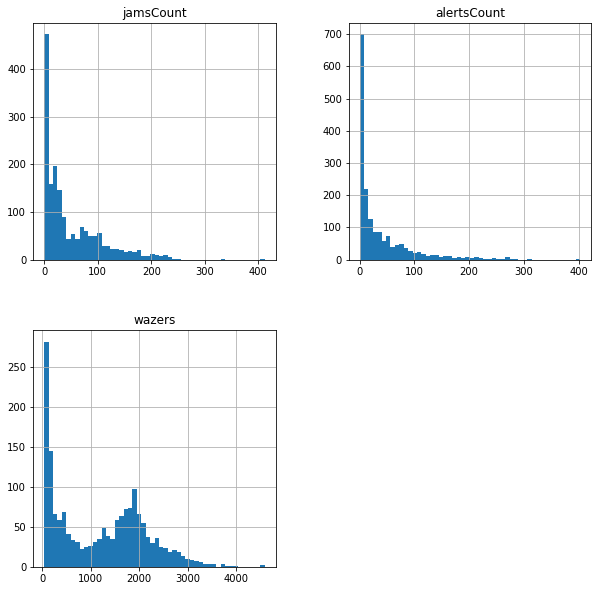

In [23]:
jAwDf.hist(column = ['jamsCount','alertsCount','wazers'],bins = 50,figsize = (10,10));

scatter plot

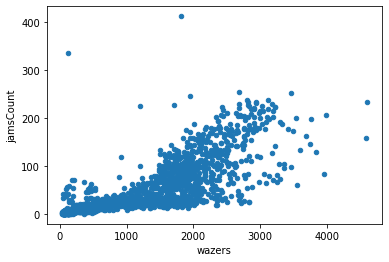

In [24]:
jAwDf.plot.scatter(x="wazers", y="jamsCount");

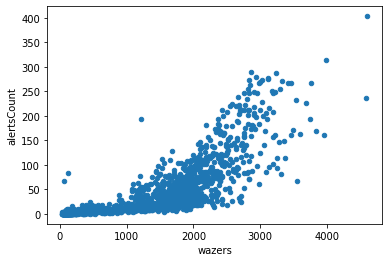

In [25]:
jAwDf.plot.scatter(x="wazers", y="alertsCount");

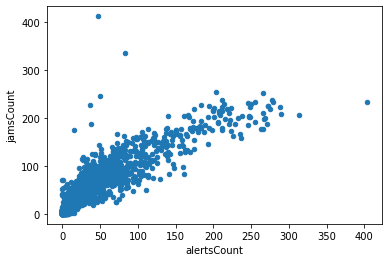

In [26]:
jAwDf.plot.scatter(x="alertsCount", y="jamsCount");

test normálního rozdělení (p-Value - pravděpodobnost, že by se jednalo o normální rozdělení)

In [27]:
shapiro(jAwDf['jamsCount'])

ShapiroResult(statistic=0.8179409503936768, pvalue=1.390564518088089e-40)

In [28]:
shapiro(jAwDf['alertsCount'])

ShapiroResult(statistic=0.7064236998558044, pvalue=0.0)

In [29]:
shapiro(jAwDf['wazers'])

ShapiroResult(statistic=0.9205938577651978, pvalue=2.3798088890928379e-29)

test, zda existuje mezi proměnnými závislost (p-Value indikuje pravděpodobnost, že by se jednalo o systém bez korelace)

In [30]:
r_value, p_value = pearsonr(jAwDf['wazers'],jAwDf['jamsCount'])
p_value

0.0

In [31]:
r_value2, p_value2 = pearsonr(jAwDf['wazers'],jAwDf['alertsCount'])
p_value2

0.0

In [32]:
r_value3, p_value3 = pearsonr(jAwDf['jamsCount'],jAwDf['alertsCount'])
p_value3

0.0

výpočet korelace

In [33]:
jAwDf.corr(method="spearman")

,hour,day,jamsCount,alertsCount,wazers
hour,1.000000,-0.000270,0.299625,0.261907,0.365374
day,-0.000270,1.000000,-0.217577,-0.203648,-0.049264
jamsCount,0.299625,-0.217577,1.000000,0.918092,0.889202
alertsCount,0.261907,-0.203648,0.918092,1.000000,0.917992
wazers,0.365374,-0.049264,0.889202,0.917992,1.000000


rozdělení souboru dat podle denní doby

In [34]:
dayPart = []
for i in range(0,len(jAwDf['hour'])):
    if jAwDf['hour'][i] in (22,23,0,1,2,3,4,5):
        dayPart.append(8)
    else:
        dayPart.append(16)

In [35]:
jAwDf['dayPart']= dayPart

In [36]:
jAwDfDay = jAwDf[jAwDf['dayPart'] == 16]

In [37]:
jAwDfNight = jAwDf[jAwDf['dayPart'] == 8]

testy pro DEN

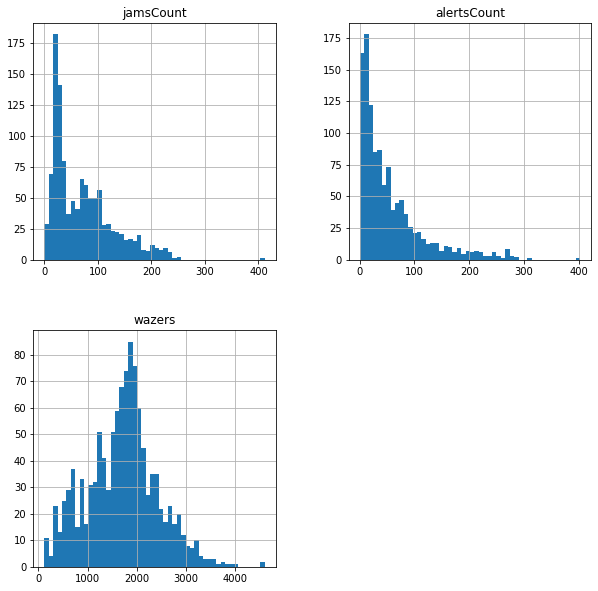

In [38]:
jAwDfDay.hist(column = ['jamsCount','alertsCount','wazers'],bins = 50,figsize = (10,10));

In [39]:
shapiro(jAwDfDay['wazers'])

ShapiroResult(statistic=0.9884331822395325, pvalue=6.12383317388776e-08)

In [40]:
r_valueD, p_valueD = pearsonr(jAwDfDay['wazers'],jAwDfDay['jamsCount'])
p_valueD

4.848240576743751e-179

In [41]:
r_valueD2, p_valueD2 = pearsonr(jAwDfDay['wazers'],jAwDfDay['alertsCount'])
p_valueD2

2.012629846671277e-225

In [42]:
jAwDfDay.corr(method = 'spearman')

,hour,day,jamsCount,alertsCount,wazers,dayPart
hour,1.000000,-0.000284,-0.273583,-0.334337,-0.190262,NaN
day,-0.000284,1.000000,-0.486350,-0.392576,-0.131893,NaN
jamsCount,-0.273583,-0.486350,1.000000,0.898292,0.756798,NaN
alertsCount,-0.334337,-0.392576,0.898292,1.000000,0.830542,NaN
wazers,-0.190262,-0.131893,0.756798,0.830542,1.000000,NaN
dayPart,NaN,NaN,NaN,NaN,NaN,NaN


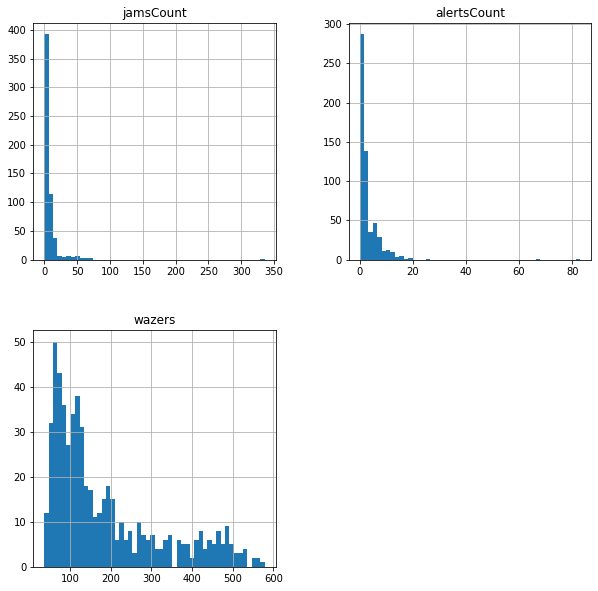

In [43]:
jAwDfNight.hist(column = ['jamsCount','alertsCount','wazers'],bins = 50,figsize = (10,10));

rozdělení Df podle počtu Wazerů (<= 800 a >800)

In [44]:
wazersPart = []
for i in range(0,len(jAwDf['hour'])):
    if jAwDf['wazers'][i] <= 800:
        wazersPart.append(0)
    else:
        wazersPart.append(1)

In [45]:
jAwDf['wazersPart']= wazersPart

In [46]:
jAwDfLow = jAwDf[jAwDf['wazersPart'] == 0]

In [47]:
jAwDfHigh = jAwDf[jAwDf['wazersPart'] == 1]

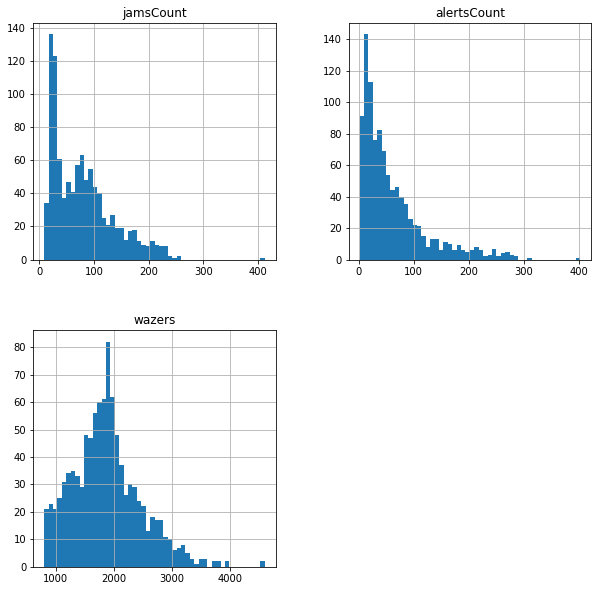

In [48]:
jAwDfHigh.hist(column = ['jamsCount','alertsCount','wazers'],bins = 50,figsize = (10,10));

In [49]:
shapiro(jAwDfHigh['wazers'])

ShapiroResult(statistic=0.9693310856819153, pvalue=8.438973668088365e-14)

In [50]:
r_valueH, p_valueH = pearsonr(jAwDfHigh['wazers'],jAwDfHigh['jamsCount'])
p_valueH

3.645201913533496e-128

In [51]:
jAwDfHigh.corr(method="spearman")

,hour,day,jamsCount,alertsCount,wazers,dayPart,wazersPart
hour,1.000000,0.137064,-0.313716,-0.341970,-0.143510,NaN,NaN
day,0.137064,1.000000,-0.528606,-0.439720,-0.104159,NaN,NaN
jamsCount,-0.313716,-0.528606,1.000000,0.874074,0.667372,NaN,NaN
alertsCount,-0.341970,-0.439720,0.874074,1.000000,0.759523,NaN,NaN
wazers,-0.143510,-0.104159,0.667372,0.759523,1.000000,NaN,NaN
dayPart,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wazersPart,NaN,NaN,NaN,NaN,NaN,NaN,NaN


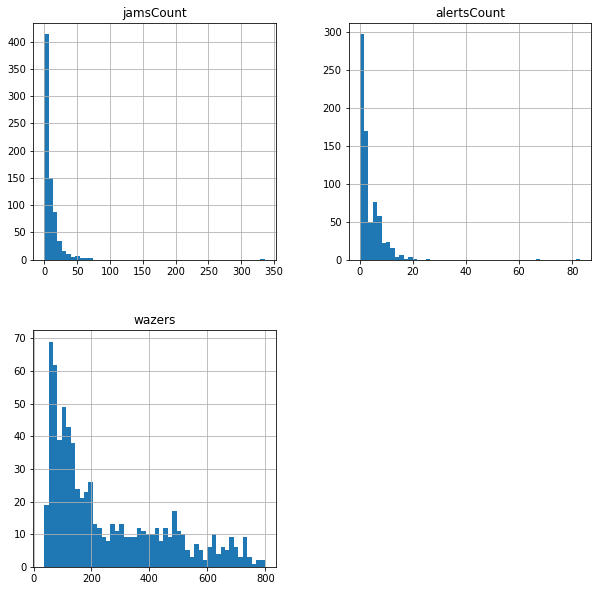

In [52]:
jAwDfLow.hist(column = ['jamsCount','alertsCount','wazers'],bins = 50,figsize = (10,10));